<h1>Projeto 3 - "Montanha-Russa"</h1>

Marcelo Lisboa de Castro Reis e Rogério Ferrari - 
1C

**Sistema Físico:**

<img src="sistFis3.png"/, width=400, height=300 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 1: Sistema mecânico da montanha russa dividido em duas partes: a rampa e o looping

**Diagramas de Corpo Livre e Eixo de Coordenadas:**

<img src="eixocordenadas.png"/, width=400, height=300 style="float: center; margin: 0px 0px 10px 10px">  
Figura 2: Diagrama de Corpo Livre da rampa e do looping com as forças atuantes e o eixo de coordenadas 


**Equações Diferenciais:**

1) Rampa:

$\Large{\frac{d_2Xr}{dt_2}=\frac{1}{m} \cdot [{F}_{at^x} + {F}_{Rar^x} - {N}_{x}] }$

$\Large{\frac{d_2Yr}{dt_2}=\frac{1}{m} \cdot [{F}_{at^y} + {F}_{Rar^y} + {N}_{y}] - {g} }$

2) Looping:

$\Large{\frac{d_2Xl}{dt_2}=\frac{1}{m} \cdot [- {F}_{at^x} - {F}_{Rar^x} - {N}_{x}] }$

$\Large{\frac{d_2Yl}{dt_2}=\frac{1}{m} \cdot [{F}_{at^y} + {F}_{Rar^y} - {N}_{y}] - {g} }$


**Simplificações:**

- Nosso sistema considera apenas o mi dinâmico, desconsideramos situações em que carrinho não se desloca por causa do mi estático
- Pelo nosso modelo vamos saber se o carrinho cairia se a normal fosse negativa

## Segunda parte - Loop: ##

In [10]:
## Proejto 3 - Montanha Russa

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

#RAMPA

#Parâmetros:
pho = 1.2754 #Kg/m3
Cd = 1.05
A = 2.5*1.5 #(Largura*altura) #m2
mi = 0.3
g = 10 #m/s
m = 500 #kg
ang = math.radians(45)

#Função Equação Diferencial:
def EqDifRampa (listasolucoes, t, m, angulo):
    x = listasolucoes[0]
    y = listasolucoes[1]
    vx = listasolucoes[2]
    vy = listasolucoes[3]
    #Forças    
    N = m*g*math.cos(angulo)
    Fatx = mi*N*math.cos(angulo)
    Faty = mi*N*math.sin(angulo)
    FRarx = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vx/math.sqrt(vx**2+vy**2))
    FRary = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vy/math.sqrt(vx**2+vy**2))
    Nx = N*math.sin(angulo)
    Ny = N*math.cos(angulo)
    P = m*g
    #Equações
    dxdt = vx
    dydt = vy
    dvxdt = (1/m)*(Fatx+FRarx-Nx)
    dvydt = (1/m)*(Faty+FRary+Ny-P)
    #Se o carrinho chegar à altura mínima, ele vai parar e não vai afundar
    if y<=0:
        dxdt = 0
        #dvxdt = 0#
        dydt = 0
        #dvydt = 0#
    return [dxdt, dydt, dvxdt, dvydt]

#Condições Iniciais:
v0 = 0.01 #m/s
comprimento=40
altura=math.tan(ang)*comprimento
CI = [comprimento, altura, -math.cos(ang)*v0, - math.sin(ang)*v0]

#Lista tempo:
delta_t = 1e-3
tempo = np.arange(0,5,delta_t) #8,delta_t) #

#Solução e Gráficos:
solucao_rampa = odeint(EqDifRampa, CI, tempo, args=(m, ang))


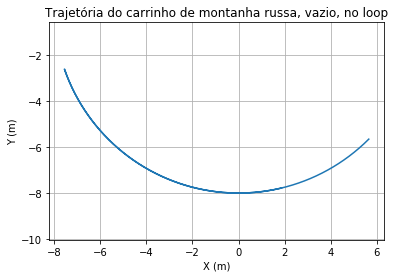

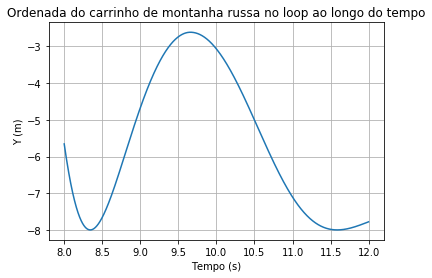

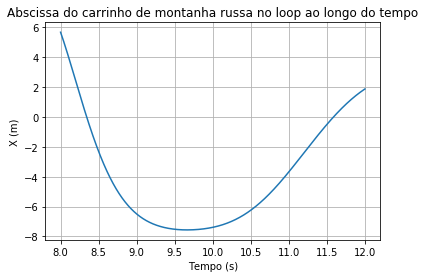

In [11]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

#LOOPING

#Parâmetros:
R = 8 #m

listaNormais = []
#caiu = False

#Equação Diferencial:
def EqDifLoop (listasolucoes, t, raio):
    x = listasolucoes[0]
    y = listasolucoes[1]
    vx = listasolucoes[2]
    vy = listasolucoes[3]
    #Forças 
    P = m*g
    N = ((m*(vx**2+vy**2))/raio) - P*(y/math.sqrt(x**2+y**2))
    listaNormais.append(N)
    Fatx = mi*N*(vx/math.sqrt(vx**2+vy**2))
    Faty = mi*N*(-vy/math.sqrt(vx**2+vy**2))
    FRarx = (1/2)*pho*Cd*A*(vx**2+vy**2)*(vx/math.sqrt(vx**2+vy**2))
    FRary = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vy/math.sqrt(vx**2+vy**2))
    Nx = N*(x/math.sqrt(x**2+y**2))
    Ny = N*(y/math.sqrt(x**2+y**2))
    #Equações
    dxdt = vx
    dydt = vy
    dvxdt = (1/m)*(-Fatx-FRarx-Nx)
    dvydt = (1/m)*(Faty+FRary-Ny-P)
    return [dxdt, dydt, dvxdt, dvydt]

#Condições Iniciais no Loop:
vxrampa = solucao_rampa [:,2]
vx0= vxrampa[-1]
vyrampa = solucao_rampa [:,3]
vy0= vyrampa[-1]

altura_loop = R*math.cos(ang)
comprimento_loop = R*math.sin(ang)

CI2 = [comprimento_loop, - altura_loop ,vx0, vy0]
#print("CI loop: {}".format(CI2))
    
#Lista tempo:
delta_t = 1e-3
tempo_loop = np.arange(8,12,delta_t)

#Solução e Gráficos:
solucao_loop = odeint(EqDifLoop, CI2, tempo_loop, args=(R,))
plt.plot(solucao_loop[:,0], solucao_loop[:,1])
plt.title('Trajetória do carrinho de montanha russa, vazio, no loop')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis ('equal')
plt.show()
#print(listaNormais) #conseguimos saber se o carrinho cai ou não se a normal é negativa
#print('Caiu: {}'.format(caiu))

plt.plot(tempo_loop, solucao_loop[:,1])
plt.title('Ordenada do carrinho de montanha russa no loop ao longo do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

plt.plot(tempo_loop, solucao_loop[:,0])
plt.title('Abscissa do carrinho de montanha russa no loop ao longo do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('X (m)')
plt.grid(True)
plt.show()

Já que a velocidade inicial do carrinho nas condições decorrentes da rampa não são suficientes para o carrinho completar o loop, resolvemos, para continuar nossas iterações, desconsiderar o atrito e a resistência do ar SOMENTE no loop

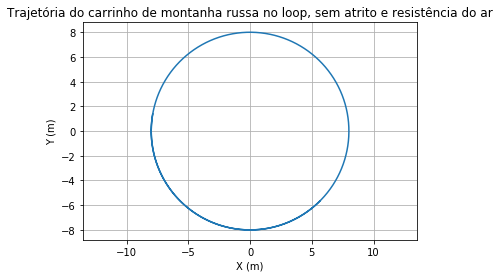

In [12]:
def EqDifLoop_semFatRar (listasolucoes, t, raio):
    x = listasolucoes[0]
    y = listasolucoes[1]
    vx = listasolucoes[2]
    vy = listasolucoes[3]
    #Forças 
    P = m*g
    N = ((m*(vx**2+vy**2))/raio) - P*(y/math.sqrt(x**2+y**2))
    listaNormais.append(N)
    Fatx = mi*N*(vx/math.sqrt(vx**2+vy**2))*0
    Faty = mi*N*(-vy/math.sqrt(vx**2+vy**2))*0
    FRarx = (1/2)*pho*Cd*A*(vx**2+vy**2)*(vx/math.sqrt(vx**2+vy**2))*0
    FRary = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vy/math.sqrt(vx**2+vy**2))*0
    Nx = N*(x/math.sqrt(x**2+y**2))
    Ny = N*(y/math.sqrt(x**2+y**2))
    #Equações
    dxdt = vx
    dydt = vy
    dvxdt = (1/m)*(-Fatx-FRarx-Nx)
    dvydt = (1/m)*(Faty+FRary-Ny-P)       
    return [dxdt, dydt, dvxdt, dvydt]

#Solução e Gráficos:
solucao_loop_semFatRar = odeint(EqDifLoop_semFatRar, CI2, tempo_loop, args=(R,))
plt.plot(solucao_loop_semFatRar[:,0], solucao_loop_semFatRar[:,1])
plt.title('Trajetória do carrinho de montanha russa no loop, sem atrito e resistência do ar')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis ('equal')
plt.show()

Novamente utilizamos a lei da conservação de energia para fazer a validação do nosso modelo! Abaixo está o gráfico com as energias da segunda parte do sistema (loop):

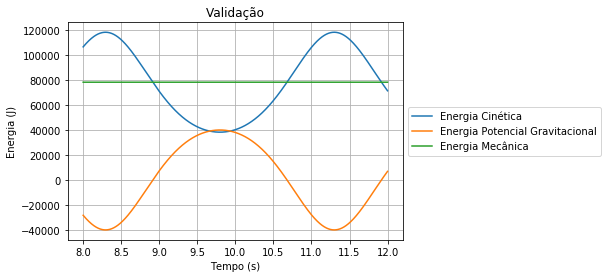

In [13]:
from math import sqrt

energia_cinetica = []
ep_gravitacional =  []
energia_total = []

for i in range (0, len(tempo_loop)):    
    x = solucao_loop_semFatRar[:,0][i]
    y = solucao_loop_semFatRar[:,1][i]
    vx = solucao_loop_semFatRar[:,2][i]
    vy = solucao_loop_semFatRar[:,3][i]
    v = sqrt(vx**2+vy**2)
    cinetica = ((m*v**2)/2)
    potgrav = (m*g*y)
    energia_cinetica.append(cinetica)
    ep_gravitacional.append(potgrav)
    energia_total.append(cinetica+potgrav)
    
plt.plot(tempo_loop, energia_cinetica, label='Energia Cinética')
plt.plot(tempo_loop, ep_gravitacional, label='Energia Potencial Gravitacional')
plt.plot(tempo_loop, energia_total, label='Energia Mecânica')
plt.title("Validação")
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## Iterações: ##

Resolvemos variar o raio do loop para ver o que aconteceria:

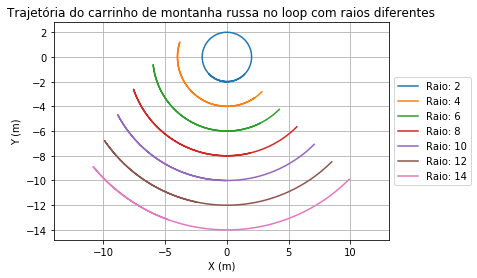

Agora sem atrito e sem Resistência do ar:


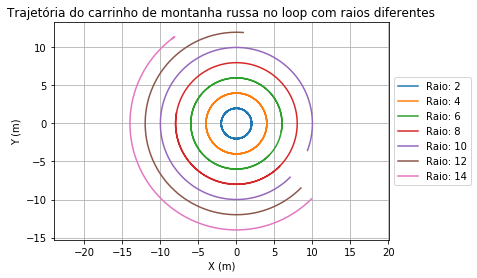

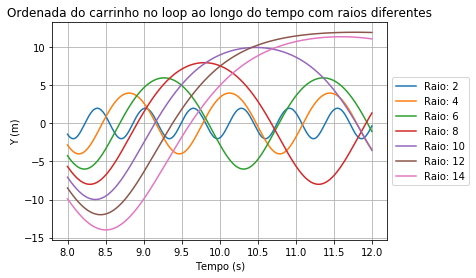

In [14]:
Raios = [2,4,6,8,10,12,14]

for r in Raios:
    altura_loop = r*math.cos(ang)
    comprimento_loop = r*math.sin(ang)
    ci = [comprimento_loop, - altura_loop ,vx0, vy0]
    solucao= odeint(EqDifLoop, ci, tempo_loop, args=(r,))
    plt.plot(solucao[:,0], solucao[:,1], label='Raio: {0}'.format(r))
    
plt.title('Trajetória do carrinho de montanha russa no loop com raios diferentes')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.axis ('equal')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print('Agora sem atrito e sem Resistência do ar:')

for r in Raios:
    altura_loop = r*math.cos(ang)
    comprimento_loop = r*math.sin(ang)
    ci = [comprimento_loop, - altura_loop ,vx0, vy0]
    solucao= odeint(EqDifLoop_semFatRar, ci, tempo_loop, args=(r,))
    plt.plot(solucao[:,0], solucao[:,1], label='Raio: {0}'.format(r))
    
plt.title('Trajetória do carrinho de montanha russa no loop com raios diferentes')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.axis ('equal')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for r in Raios:
    altura_loop = r*math.cos(ang)
    comprimento_loop = r*math.sin(ang)
    ci = [comprimento_loop, - altura_loop ,vx0, vy0]
    solucao= odeint(EqDifLoop_semFatRar, ci, tempo_loop, args=(r,))
    plt.plot(tempo_loop, solucao[:,1], label='Raio: {0}'.format(r))
    
plt.title('Ordenada do carrinho no loop ao longo do tempo com raios diferentes')
plt.xlabel('Tempo (s)')
plt.ylabel('Y (m)')
#plt.axis ('equal')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Para finalizar, baseado nas análises de sensibilidade anteriores do loop, resolvemos descobrir quanto tempo leva para que o carrinho de montanha russa chege na altura que equivale à cordenada zero do loop. Observamos o resultado da variação do raio do loop e plotamos o seguinte gráfico:

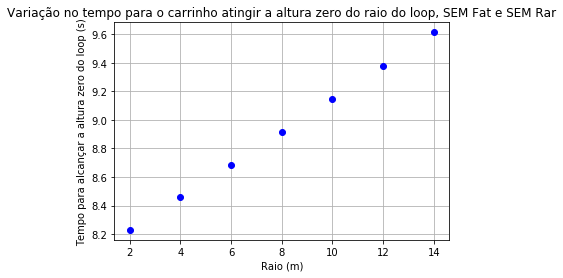

In [15]:
def tempo_ate_raio (listaTempo, solucao):
    tempoRaio=1
    for i, t in enumerate(solucao):
        if t >= 0:
            tempoRaio=listaTempo[i]
            break
    return tempoRaio

listaTempoRaio_semFatRar = []

for r in Raios:
    altura_loop = r*math.cos(ang)
    comprimento_loop = r*math.sin(ang)
    ci = [comprimento_loop, - altura_loop ,vx0, vy0]
    sol_raio= odeint(EqDifLoop_semFatRar, ci, tempo_loop, args=(r,))
    alt_loop = sol_raio[:,1]
    listaTempoRaio_semFatRar.append(tempo_ate_raio(tempo_loop, alt_loop))
    
plt.plot(Raios, listaTempoRaio_semFatRar,  "bo")
plt.title("Variação no tempo para o carrinho atingir a altura zero do raio do loop, SEM Fat e SEM Rar")
plt.xlabel("Raio (m)")
plt.ylabel("Tempo para alcançar a altura zero do loop (s)")
plt.grid(True)
plt.show()    